<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_2_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA_%E2%84%9629.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Завдання 1
# Вивести перших 5 рядків

import pandas as pd

# Таблиця з Вікіпедії
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(url)
df = tables[2]

# Відображення перших рядків таблиці для перевірки
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [ ]:
# Завдання 2
# Вивести розмір датасета

# Розмір датасету(перший елемент — кількість рядків, другий — кількість стовпців)
df.shape

(210, 7)

In [ ]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [ ]:
# Завдання 3
# Визначити оптимальну кількість стовпців

missing_data = df.isnull().sum()
print(missing_data)

# зараз оптимальна кількість стовпців

Country                 0
IMF_Year                0
WorldBank_Year          0
UN_Year                 0
MVF_2024                0
WorldBank_2023          0
OON_2022                0
Difference              0
Std_Deviation           0
MVF_2024_Share          0
WorldBank_2023_Share    0
OON_2022_Share          0
dtype: int64


In [ ]:
# Завдання 4
# Замінити назви стовпців на більш зручні

new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]

df.columns = new_columns

df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [ ]:
selected_columns = {
    'IMF_Forecast' : 'MVF_2024',
    'WorldBank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
}

df1 = df[['Country', 'IMF_Year', 'WorldBank_Year', 'UN_Year'] + list(selected_columns.keys())]

df = df1.rename(columns=selected_columns)

df.head()

,Country,IMF_Year,WorldBank_Year,UN_Year,MVF_2024,WorldBank_2023,OON_2022
0,World,2024,2023,2022,109529216,105435540,100834796
1,United States,2024,2023,2022,28781083,27360935,25744100
2,China,[n 1]2024,[n 3]2023,[n 1]2022,18532633,17794782,17963170
3,Germany,2024,2023,2022,4591100,4456081,4076923
4,Japan,2024,2023,2022,4110452,4212945,4232173


In [ ]:
# Завдання 5
# Визначити тип даних

df.dtypes

,0
Country,object
IMF_Year,object
WorldBank_Year,object
UN_Year,object
MVF_2024,object
WorldBank_2023,object
OON_2022,object


In [ ]:
# Завдання 6
# Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності замінити пропущені значення на середнє значення

df.replace('—', float('NaN'), inplace=True)

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')
df['IMF_Year'] = pd.to_numeric(df['IMF_Year'], errors='coerce')
df['WorldBank_Year'] = pd.to_numeric(df['WorldBank_Year'], errors='coerce')
df['UN_Year'] = pd.to_numeric(df['UN_Year'], errors='coerce')

print("Типи даних стовпців:\n", df.dtypes)

df['MVF_2024'].fillna(df['MVF_2024'].mean(), inplace=True)
df['WorldBank_2023'].fillna(df['WorldBank_2023'].mean(), inplace=True)
df['OON_2022'].fillna(df['OON_2022'].mean(), inplace=True)
df['IMF_Year'].fillna(df['IMF_Year'].mean(), inplace=True)
df['WorldBank_Year'].fillna(df['WorldBank_Year'].mean(), inplace=True)
df['UN_Year'].fillna(df['UN_Year'].mean(), inplace=True)

print("\nКількість пропущених значень після заміни:\n", df.isna().sum())

Типи даних стовпців:
 Country            object
IMF_Year          float64
WorldBank_Year    float64
UN_Year           float64
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object

Кількість пропущених значень після заміни:
 Country           0
IMF_Year          0
WorldBank_Year    0
UN_Year           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


In [ ]:
# Завдання 7
# Ще раз перевірити наявність пропущених значень

# Перевірити кількість пропущених значень після заміни
print("\nКількість пропущених значень:\n", df.isna().sum())


Кількість пропущених значень:
 Country           0
IMF_Year          0
WorldBank_Year    0
UN_Year           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


In [ ]:
# Завдання 8
# Перевірити наявність дублікатів. При наявності виявити дублікати

duplicates = df[df.duplicated()]

print(f"Кількість дублікатів: {duplicates.shape[0]}")

print("Дублікати:\n", duplicates)

Кількість дублікатів: 0
Дублікати:
 Empty DataFrame
Columns: [Country, IMF_Year, WorldBank_Year, UN_Year, MVF_2024, WorldBank_2023, OON_2022]
Index: []


In [ ]:
# Завдання 9
# Вивести описову статистику датасету describe()

df.describe()

,IMF_Year,WorldBank_Year,UN_Year,MVF_2024,WorldBank_2023,OON_2022
count,210.000000,210.000000,210.0,2.100000e+02,2.100000e+02,2.100000e+02
mean,2023.962366,2022.903061,2022.0,1.123228e+06,1.037206e+06,9.612699e+05
std,0.246861,0.332873,0.0,7.900707e+06,7.602076e+06,7.275608e+06
min,2022.000000,2021.000000,2022.0,6.600000e+01,6.200000e+01,5.900000e+01
25%,2024.000000,2023.000000,2022.0,1.464775e+04,1.044175e+04,8.928250e+03
50%,2024.000000,2023.000000,2022.0,6.215800e+04,4.341600e+04,3.210250e+04
75%,2024.000000,2023.000000,2022.0,4.366365e+05,3.376592e+05,2.412485e+05
max,2024.000000,2023.000000,2022.0,1.095292e+08,1.054355e+08,1.008348e+08


In [ ]:
# Завдання 10
# Визначте відхилення (різницю) між показниками MVF_2023 та WorldBank_2023 для кожної країни. У яких країн ці показники найбільше відрізняються (дати відповідь) ?

# видалення рядку 'World'
df = df[~df['Country'].str.contains('World', na=False)]

df['Difference'] = df['MVF_2024'] - df['WorldBank_2023']

max_diff = df['Difference'].abs().max()
countries_with_max_diff = df[df['Difference'].abs() == max_diff]

print("Країни з найбільшими відхиленнями:")
countries_with_max_diff[['Country', 'MVF_2024', 'WorldBank_2023', 'Difference']]

# більше всього відрізняється у Сполучених Штатів Америки

Країни з найбільшими відхиленнями:


,Country,MVF_2024,WorldBank_2023,Difference
1,United States,28781083.0,27360935.0,1420148.0


In [ ]:
# Завдання 11
# Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію ?

correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()

print("Матриця кореляції:")
print(correlation_matrix)

max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]
print("\nПари змінних з найвищою кореляцією:")
max_corr.head()

NameError: name 'df' is not defined

In [ ]:
# Завдання 12
# Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками ?

mean_by_imf_year = df.groupby('IMF_Year')['MVF_2024'].mean()
mean_by_worldbank_year = df.groupby('WorldBank_Year')['WorldBank_2023'].mean()
mean_by_un_year = df.groupby('UN_Year')['OON_2022'].mean()

print("Середні значення MVF_2024 по роках:")
print(mean_by_imf_year)

print("\nСередні значення WorldBank_2023 по роках:")
print(mean_by_worldbank_year)

print("\nСередні значення OON_2022 по роках:")
print(mean_by_un_year)

Середні значення MVF_2024 по роках:
IMF_Year
2022.000000    3.703100e+04
2023.000000    3.382370e+05
2023.962366    1.539102e+06
2024.000000    4.914963e+05
Name: MVF_2024, dtype: float64

Середні значення WorldBank_2023 по роках:
WorldBank_Year
2021.000000    4.690333e+03
2022.000000    2.594138e+04
2022.903061    1.883421e+06
2023.000000    4.785394e+05
Name: WorldBank_2023, dtype: float64

Середні значення OON_2022 по роках:
UN_Year
2022.0    483406.095007
Name: OON_2022, dtype: float64


In [ ]:
# Завдання 13
# Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками ?

df['Std_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

max_variability_country = df.loc[df['Std_Deviation'].idxmax()]

# Виведення результатів
print("Країна з найвищою варіативністю у показниках між роками:")
print(max_variability_country[['Country', 'Std_Deviation']])

Країна з найвищою варіативністю у показниках між роками:
Country           United States
Std_Deviation    1519552.648063
Name: 1, dtype: object


In [ ]:
# Завдання 14
# Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).

max_mvf_country = df.loc[df['MVF_2024'].idxmax()]['Country']
max_worldbank_country = df.loc[df['WorldBank_2023'].idxmax()]['Country']
max_un_country = df.loc[df['OON_2022'].idxmax()]['Country']

min_mvf_country = df.loc[df['MVF_2024'].idxmin()]['Country']
min_worldbank_country = df.loc[df['WorldBank_2023'].idxmin()]['Country']
min_un_country = df.loc[df['OON_2022'].idxmin()]['Country']

print("Країна з найвищими показниками у кожному році:")
print(f"MVF_2024: {max_mvf_country}")
print(f"WorldBank_2023: {max_worldbank_country}")
print(f"OON_2022: {max_un_country}")

print("\nКраїна з найнижчими показниками у кожному році:")
print(f"MVF_2024: {min_mvf_country}")
print(f"WorldBank_2023: {min_worldbank_country}")
print(f"OON_2022: {min_un_country}")

Країна з найвищими показниками у кожному році:
MVF_2024: United States
WorldBank_2023: United States
OON_2022: United States

Країна з найнижчими показниками у кожному році:
MVF_2024: Tuvalu
WorldBank_2023: Tuvalu
OON_2022: Tuvalu


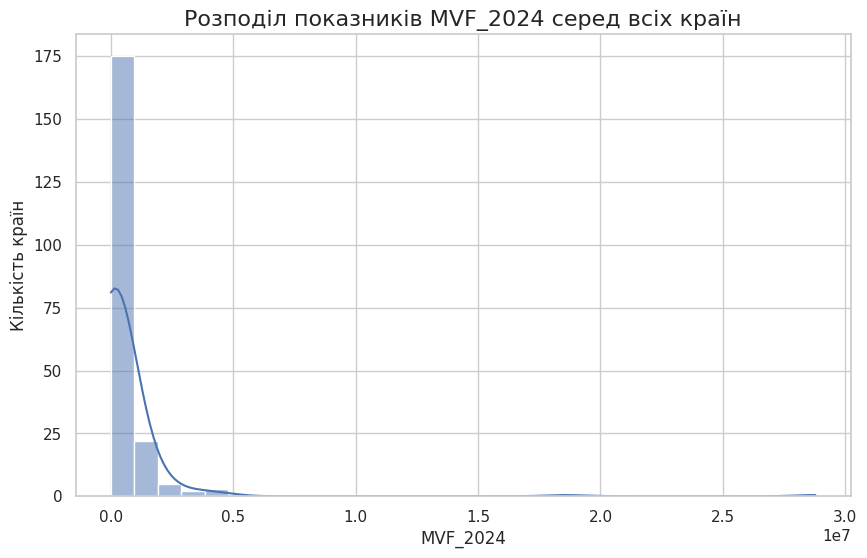

In [ ]:
# Завдання 15
# Побудуйте діаграму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл ? Чи є країни що виділяються ?

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['MVF_2024'], bins=30, kde=True)

plt.title('Розподіл показників MVF_2024 серед всіх країн', fontsize=16)
plt.xlabel('MVF_2024', fontsize=12)
plt.ylabel('Кількість країн', fontsize=12)

plt.show()

# з графіку видно що є велика концентрація країн з низьким показником ВВП за  версією MVF, виділяється невелика кількість країн з великим показником ВВП.

In [ ]:
# Завдання 16
# Розрахуйте частку кожної країни в загальному значенні для кожного року (MVG_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь) ?

total_mvf = df['MVF_2024'].sum()
total_worldbank = df['WorldBank_2023'].sum()
total_un = df['OON_2022'].sum()

df['MVF_2024_Share'] = df['MVF_2024'] / total_mvf
df['WorldBank_2023_Share'] = df['WorldBank_2023'] / total_worldbank
df['OON_2022_Share'] = df['OON_2022'] / total_un

print("Частки країн в загальному значенні для MVF_2024:")
print(df[['Country', 'MVF_2024_Share']].sort_values(by='MVF_2024_Share', ascending=False))

print("\nЧастки країн в загальному значенні для WorldBank_2023:")
print(df[['Country', 'WorldBank_2023_Share']].sort_values(by='WorldBank_2023_Share', ascending=False))

print("\nЧастки країн в загальному значенні для OON_2022:")
print(df[['Country', 'OON_2022_Share']].sort_values(by='OON_2022_Share', ascending=False))

# З часом економіки країн збільшують свій вплив у світовій економіці. Таке зростання частки може бути пов'язане з швидким економічним зростанням, зміцненням фінансової стійкості або успішною реалізацією економічних реформ.

Частки країн в загальному значенні для MVF_2024:
              Country  MVF_2024_Share
1       United States    2.277911e-01
2               China    1.466786e-01
3             Germany    3.633677e-02
4               Japan    3.253263e-02
5               India    3.115991e-02
..                ...             ...
205          Kiribati    2.461444e-06
206             Palau    2.437700e-06
207  Marshall Islands    2.413956e-06
208             Nauru    1.274252e-06
209            Tuvalu    5.223643e-07

[209 rows x 2 columns]

Частки країн в загальному значенні для WorldBank_2023:
              Country  WorldBank_2023_Share
1       United States          2.434729e-01
2               China          1.583479e-01
3             Germany          3.965270e-02
4               Japan          3.748914e-02
5               India          3.158916e-02
..                ...                   ...
207  Marshall Islands          2.527191e-06
205          Kiribati          2.482698e-06
206             Pal

In [ ]:
# Завдання 17
# Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь) ?

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for i, row in df.iterrows():
    plt.plot(['2022', '2023', '2024'], [row['OON_2022'], row['WorldBank_2023'], row['MVF_2024']], marker='o', label=row['Country'])

plt.title("Зміни показників для кожної країни за три роки")
plt.xlabel("Рік")
plt.ylabel("Значення")
plt.grid(True)
plt.xticks(['2022', '2023', '2024'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()

plt.show()

# Стабільне зростання показує невелика кількість країн: США, Китай, Германія, Японія, Індія, Великобританія та Франція. У всіх інших не велике зростання.

NameError: name 'df' is not defined

<Figure size 1400x800 with 0 Axes>